# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split



**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 
df = df0.copy()

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


    * To assess model assumption
    * To understand data structure
    * To identify missing values
    * To address inconsistency in data format

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print(df.shape)
print(df.info())



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print("Missing values in each column")
print(df.isna().sum())
print('dataframe before droping duplicate:', df.shape)
df = df.drop_duplicates()
print('dataframe after droping duplicates ', df.shape)

Missing values in each column
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
dataframe before droping duplicate: (22699, 18)
dataframe after droping duplicates  (22699, 18)


* Since the dataframe shape before and after removing duplicates is the same, this means the dataframe has no duplicates.

Use `.describe()`.

In [5]:
# Use .describe()
df0.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data

df['tpep_dropoff_datetime'][0]


'03/25/2017 9:09:47 AM'

In [7]:
# Convert datetime columns to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format= '%m/%d/%Y %H:%M:%S %p')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %H:%M:%S %p')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 02:53:28,2017-04-11 03:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 01:17:59,2017-05-07 01:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 11:32:20,2017-04-15 11:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [469]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

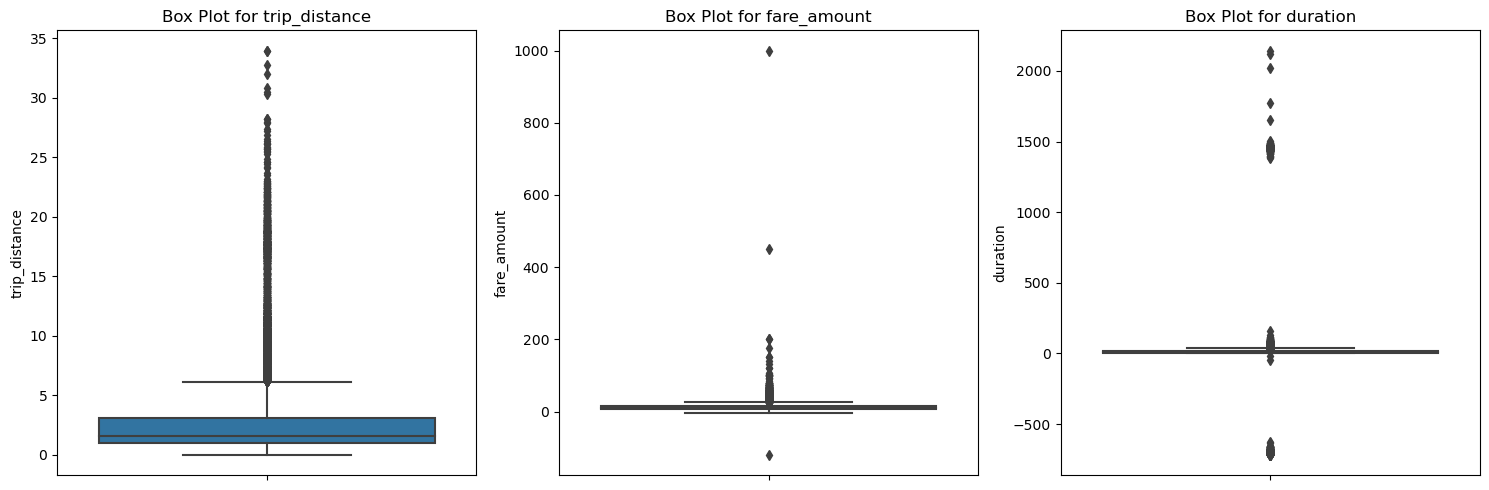

In [9]:
### YOUR CODE HERE ###

# Assuming df contains your data
variables = ['trip_distance', 'fare_amount', 'duration']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))

for i, variable in enumerate(variables):
    sns.boxplot(data=df, y=variable, ax=axes[i])
    axes[i].set_title(f'Box Plot for {variable}')
    axes[i].set_ylabel(variable)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

* all variables contain outliers
* The are trips with 0 distance, yes some values are unbelievable. But may be some trips where canceled before the trip started. It's better to leave the data in this column as they are.
* No, the duration, fares, negative values do not make sence for a trip

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [471]:
# Are trip distances of 0 bad data or very short trips rounded down?
df['trip_distance'].sort_values(ascending=True).unique()[:10]


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [472]:
### YOUR CODE HERE ###
df[df['trip_distance'] == 0]['trip_distance'].value_counts()

trip_distance
0.0    148
Name: count, dtype: int64

#### `fare_amount` outliers

In [473]:
### YOUR CODE HERE ###
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?
* The maximum and minimum values are too extrem, these could be caused by an error during data entry. It is impossible to have a fare amount of -120 dollars and a fare amount of 999 dolars. 

Impute values less than $0 with `0`.

In [474]:
# Impute values less than $0 with 0
df['fare_amount'] = df['fare_amount'].where(df['fare_amount'] > 0, 0)


Now impute the maximum value as `Q3 + (6 * IQR)`.

In [475]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
  ### YOUR CODE HERE ###
    for col in column_list:
        # Reassign minimum to zero
      df.loc[df[col] < 0] = 0
          # Calculate upper threshold
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      upper_threshold = q3 + (iqr_factor * iqr)
      print(col)
      print('q3: ', q3)
      print('q1', q1)
      print('Upper threshold: ', upper_threshold)
          # Reassign values > threshold to threshold
      df.loc[df[col] > upper_threshold, col] = upper_threshold
      print(df[col].describe())


In [476]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3:  14.5
q1 6.5
Upper threshold:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [477]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        16.474546
std        178.877327
min       -717.900000
25%          6.383333
50%         10.933333
75%         18.200000
max       2144.083333
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [478]:
# Impute a 0 for any negative values
df['duration'] = df['duration'].where(df['duration'] > 0, 0)
df['duration'].min()

0.0

In [479]:
# Impute the high outliers
outlier_imputer(['duration'], 6)


duration
q3:  18.2
q1 6.383333333333334
Upper threshold:  89.10000000000001
count    22699.000000
mean        14.662699
std         13.742791
min          0.000000
25%          6.383333
50%         10.933333
75%         18.200000
max         89.100000
Name: duration, dtype: float64


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [480]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 02:53:28,2017-04-11 03:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 01:17:59,2017-05-07 01:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 11:32:20,2017-04-15 11:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


In [481]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [482]:
### YOUR CODE HERE ###
grouped = df.groupby(by='pickup_dropoff')[['trip_distance']].mean()
grouped

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [483]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [484]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==142) & (df['DOLocationID']==48)][['mean_distance']][:5]


,mean_distance
1664,0.995676
1862,0.995676
2198,0.995676
2571,0.995676
3507,0.995676


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [485]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_duration = df.groupby(by='pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped_duration_dict = grouped_duration.to_dict()
grouped_duration_dict = grouped_duration_dict['duration']
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_duration_dict)

# Confirm that it worked
df[(df['PULocationID']==142) & (df['DOLocationID']==48)][['mean_distance']][:5]


,mean_distance
1664,0.995676
1862,0.995676
2198,0.995676
2571,0.995676
3507,0.995676


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [486]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [487]:
# Create 'rush_hour' col
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
weekends = ['Sunday', 'Saturday']
df['rush_hour'] = 0
pickup = df['tpep_pickup_datetime']
for i in range(len(df)):
    if pickup.iloc[i].day_name() not in weekends and ((pickup.iloc[i].hour > 6 and pickup.iloc[i].hour < 10) or (pickup.iloc[i].hour > 16 and pickup.iloc[i].hour < 20)):
        df.loc[i, 'rush_hour'] = 1
    else:
        df.loc[i, 'rush_hour'] = 0

In [488]:
### YOUR CODE HERE ###
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,18.738889,25,3,0
1,35634249,1,2017-04-11 02:53:28,2017-04-11 03:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,21.703704,11,4,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.048571,15,12,1
3,38942136,2,2017-05-07 01:17:59,2017-05-07 01:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,7,5,0
4,30841670,2,2017-04-15 11:32:20,2017-04-15 11:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,15,4,0


In [489]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

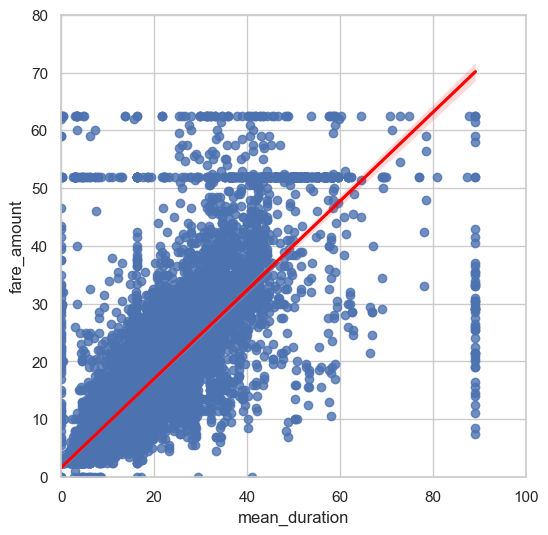

In [490]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(6,6))
sns.regplot(data=df, x='mean_duration', y='fare_amount',scatter={'alpha': 0.5, 's': 5}, line_kws={'color': 'red'})
plt.ylim(0,80)  
plt.xlim(0,100)    
plt.show()


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [491]:
### YOUR CODE HERE ###
df[df['fare_amount'] > 50][['fare_amount']].value_counts().head()

fare_amount
52.0           514
62.5            84
59.0             9
50.5             9
57.5             8
Name: count, dtype: int64

Examine the first 30 of these trips.

In [492]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 07:15:30,2017-03-05 07:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.552778,5,3,0
110,47959795,1,2017-06-03 02:24:57,2017-06-03 03:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,3,6,0
161,95729204,2,2017-11-11 08:16:16,2017-11-11 08:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,11,11,0
247,103404868,2,2017-12-06 11:37:08,2017-12-07 12:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,89.100000,132 79,19.431667,49.438889,6,12,0
379,80479432,2,2017-09-24 11:45:45,2017-09-25 12:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,89.100000,132 234,17.654000,61.756667,24,9,0
388,16226157,1,2017-02-28 06:30:05,2017-02-28 07:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,55.325397,28,2,0
406,55253442,2,2017-06-05 12:51:58,2017-06-05 01:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,0.000000,228 88,4.730000,0.000000,5,6,0
449,65900029,2,2017-08-03 10:47:14,2017-08-03 11:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,55.325397,3,8,0
468,80904240,2,2017-09-26 01:48:26,2017-09-26 02:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,26,9,0
520,33706214,2,2017-04-23 09:34:48,2017-04-23 10:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,23,4,0


**Question:** What do you notice about the first 30 trips?

* All the trips with fare amount of 52 either comes or goes to 132 location. The all have a ratecodeID of 2 which, by the data dictionary represents JFK. The fare amount appear in different months and time. Most of these rides have toll amount of 5.5 and 5.7 which indicates the rides passes through a facility with toll amount. Based on the information we have, these rides could be from or to JFK international airport. 

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [493]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [494]:
### YOUR CODE HERE ###
df_model = df[['VendorID', 'passenger_count','mean_distance', 'tolls_amount', 'fare_amount','mean_duration', 'rush_hour' ]]


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

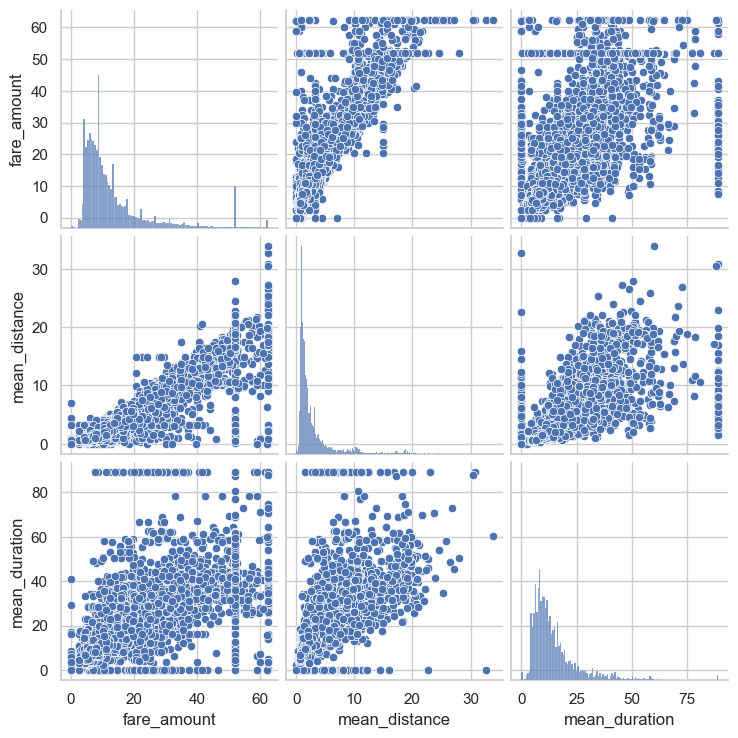

In [495]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(data=df_model[['fare_amount', 'mean_distance', 'mean_duration']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [496]:
# Correlation matrix to help determine most correlated variables
corr_matrix = df_model.corr(method='pearson')
corr_matrix

,VendorID,passenger_count,mean_distance,tolls_amount,fare_amount,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.004741,0.011122,0.001045,0.003841,-0.001994
passenger_count,0.266463,1.000000,0.013428,0.009532,0.014942,0.013555,-0.015805
mean_distance,0.004741,0.013428,1.000000,0.621229,0.910185,0.806440,-0.039906
tolls_amount,0.011122,0.009532,0.621229,1.000000,0.616719,0.464430,-0.012560
fare_amount,0.001045,0.014942,0.910185,0.616719,1.000000,0.791225,-0.041805
mean_duration,0.003841,0.013555,0.806440,0.464430,0.791225,1.000000,-0.037503
rush_hour,-0.001994,-0.015805,-0.039906,-0.012560,-0.041805,-0.037503,1.000000


Visualize a correlation heatmap of the data.

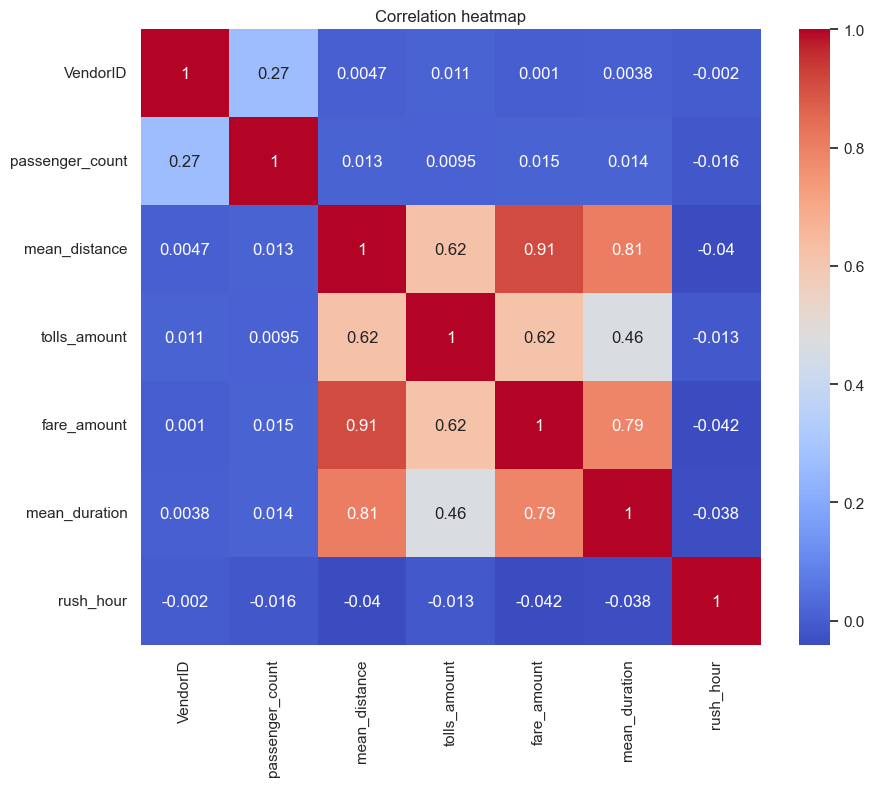

In [497]:
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix, annot=True, cmap= 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

* Mean_distance and mean_duration have strong correlation with fare_amount with a pearson coefficient of 0.91 and 0.76 respectively

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [498]:
### YOUR CODE HERE ###
df_model.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   mean_distance    22699 non-null  float64
 3   tolls_amount     22699 non-null  float64
 4   fare_amount      22699 non-null  float64
 5   mean_duration    22699 non-null  float64
 6   rush_hour        22699 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [499]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
x = df_model.drop(columns='fare_amount')
# Set y variable
y = df_model['fare_amount']

# Display first few rows
x.head()


,VendorID,passenger_count,mean_distance,tolls_amount,mean_duration,rush_hour
0,2,6,3.521667,0.0,18.738889,0
1,1,1,3.108889,0.0,21.703704,0
2,1,1,0.881429,0.0,7.048571,1
3,2,1,3.700000,0.0,30.250000,0
4,2,1,4.435000,0.0,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [500]:
# Convert VendorID to string
x['VendorID'] = x['VendorID'].astype(str)

# Get dummies
x = pd.get_dummies(data=x, drop_first=True)

x.head()



,passenger_count,mean_distance,tolls_amount,mean_duration,rush_hour,VendorID_2
0,6,3.521667,0.0,18.738889,0,True
1,1,3.108889,0.0,21.703704,0,False
2,1,0.881429,0.0,7.048571,1,False
3,1,3.700000,0.0,30.250000,0,True
4,1,4.435000,0.0,14.616667,0,True


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [516]:
# Create training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [502]:
# Standardize the X variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled)
x_train_scaled

,0,1,2,3,4,5
0,-0.497569,-0.407526,-0.225058,-0.497559,1.754504,-1.116436
1,-0.497569,-0.513546,-0.225058,-0.495933,-0.569962,0.895707
2,-0.497569,-0.378806,-0.225058,-0.133174,1.754504,0.895707
3,-0.497569,-0.436989,-0.225058,-0.706422,-0.569962,0.895707
4,-0.497569,0.095566,-0.225058,0.025934,-0.569962,0.895707
...,...,...,...,...,...,...
15884,3.422437,-0.203608,-0.225058,-0.152544,-0.569962,0.895707
15885,-0.497569,0.322545,-0.225058,1.294146,1.754504,0.895707
15886,0.286433,-0.514155,-0.225058,-0.575207,1.754504,0.895707
15887,0.286433,-0.230447,-0.225058,0.124975,-0.569962,0.895707


### Fit the model

Instantiate your model and fit it to the training data.

In [503]:
# Fit your model to the training data
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_scaled,y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [504]:
# Evaluate the model performance on the training data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
rs = regression.score(x_train_scaled, y_train)
print('R square: ', rs)
y_predict_train = regression.predict(x_train_scaled)
print('R^2: ', r2_score(y_train, y_predict_train))
print('MAE: ', mean_absolute_error(y_train,y_predict_train))
print('MSE: ', mean_squared_error(y_train, y_predict_train))

R square:  0.8442270965065402
R^2:  0.8442270965065402
MAE:  2.3863703523222957
MSE:  17.574591364224137


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [505]:
# Scale the X_test data
x_test_scaled = scaler.transform(x_test)

In [506]:
# Evaluate the model performance on the testing data
rs_test = regression.score(x_test_scaled,y_test)
print('R squared: ', rs_test)
y_predict_test = regression.predict(x_test_scaled)
print('R^2: ', r2_score(y_test, y_predict_test))
print('MAE: ', mean_absolute_error(y_test, y_predict_test))
print('MSE: ', mean_squared_error(y_test, y_predict_test))

R squared:  0.8406367005438313
R^2:  0.8406367005438313
MAE:  2.309317033329851
MSE:  17.06372373115706


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [507]:
# Create a `results` dataframe
actual = y_test
predicted = y_predict_test
residual = y_test - y_predict_test
results = pd.DataFrame({'Actual': actual, 'Predicted': predicted, 'Residual': residual})

results.head()

,Actual,Predicted,Residual
9199,12.5,9.418061,3.081939
4955,6.0,8.160597,-2.160597
16833,12.0,8.915880,3.084120
13244,20.5,20.006652,0.493348
1063,14.0,15.657621,-1.657621


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

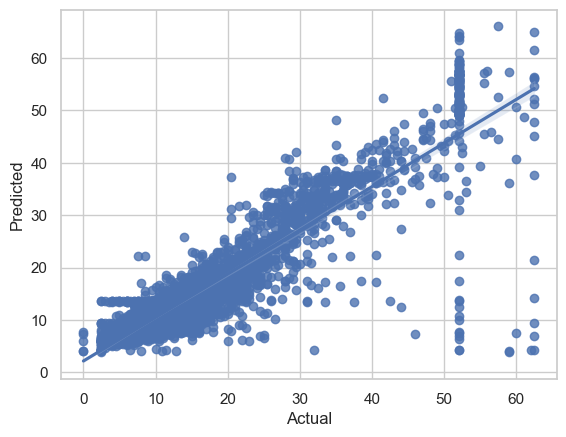

In [508]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.regplot(data=results, y='Predicted', x= 'Actual')
plt.show()

Visualize the distribution of the `residuals` using a histogram.

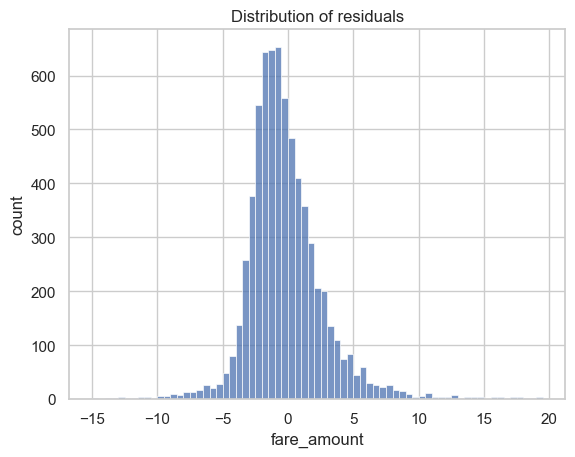

In [509]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
sns.histplot(data=results, x= residual, bins=np.arange(-15,20, 0.5))
plt.title('Distribution of residuals')
plt.ylabel('count')
plt.show()


In [510]:
# Calculate residual mean
results['Residual'].mean()

-0.013249232206329085

Create a scatterplot of `residuals` over `predicted`.

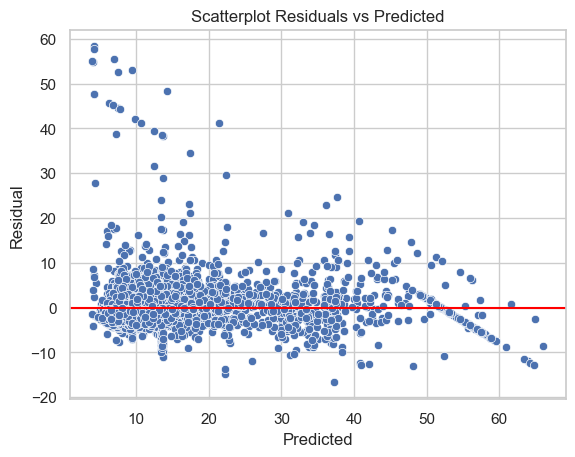

In [511]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(data=results, y='Residual', x= 'Predicted')
plt.title('Scatterplot Residuals vs Predicted')
plt.axhline(0,c='red')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [512]:
# Output the model's coefficients
coefficients = pd.DataFrame([regression.coef_], columns=x.columns)
coefficients

,passenger_count,mean_distance,tolls_amount,mean_duration,rush_hour,VendorID_2
0,0.015991,7.614487,0.966173,1.808726,-0.072836,-0.048024


What do these coefficients mean? How should they be interpreted?

while controlling for other variables, for every +1 change in standard deviation of the mean_distance, fare amount increase by 7.6 dollar.
 

In [520]:
# standard deviation for the train set
std = x_train['mean_distance'].std()
# get fare amount change for 1 mile increase
print('for every mile increase in distance the fare amount increase by: ', (coefficients['mean_distance']/std))

for every mile increase in distance the fare amount increase by:  0    2.119713
Name: mean_distance, dtype: float64


**This means for every unit increase in mean distance in mile, fare amount of the trip increase by 2 dollars**

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



* Multiple linear regression is powerful in predicting continuous outcome variable with several independent variable
* We can use EDA to test linear regression model assumptions

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 